In [1]:
from scipy.io import loadmat
from scipy.io import savemat
from scipy.stats import kurtosis, skew, entropy
from scipy import signal
import pandas as pd
import numpy as np

mdata = loadmat('dataset/sample_wave.mat')['sample_wave']

Fs = 256
t_range = np.arange(0, 4, 1/Fs)
f_range = np.arange(0, 128, 0.25)
blink_types = mdata.dtype.names # voluntary & involuntary

feature_names = [
    'fp1_mean',
    'fp1_median',
    'fp1_min',
    'fp1_max',
    'fp1_range',
    'fp1_kurtosis',
    'fp1_skew',
    # 'fp1_entropy',
    'fp2_mean',
    'fp2_median',
    'fp2_min',
    'fp2_max',
    'fp2_range',
    'fp2_kurtosis',
    'fp2_skew',
    # 'fp2_entropy',


    'fp1_delta_mean',
    'fp1_delta_min',
    'fp1_delta_max',
    'fp1_delta_range',
    'fp1_theta_mean',
    # 'fp1_theta_min',
    # 'fp1_theta_max',
    # 'fp1_theta_range',
    # 'fp1_alpha_mean',
    # 'fp1_beta_mean',
    # 'fp1_gamma_mean',
    'fp2_delta_mean',
    'fp2_delta_min',
    'fp2_delta_max',
    'fp2_delta_range',
    'fp2_theta_mean',
    # 'fp2_theta_min',
    # 'fp2_theta_max',
    # 'fp2_theta_range',
    # 'fp2_alpha_mean',
    # 'fp2_beta_mean',
    # 'fp2_gamma_mean',
    'blink'
]
eeg_bands = {'delta': (0, 4),
             'theta': (4, 8),
             'alpha': (8, 12),
             'beta': (12, 30),
             'gamma': (30, 45)}
features = pd.DataFrame(columns=feature_names)
features['blink'] = features['blink'].astype(int)

for blink_type in blink_types:

    signals = mdata[blink_type][0,0]
    epochs = signals.dtype.names # individual epoch struct

    for epoch in epochs:
        fp1 = signals[epoch][0,0][0]
        fp2 = signals[epoch][0,0][1]


        hist_fp1 = np.histogram(fp1, bins=100, density=True)[0]
        hist_fp1 += 1e-12
        hist_fp2 = np.histogram(fp2, bins=100, density=True)[0]
        hist_fp2 += 1e-12

        f, psd = signal.welch(fp1, Fs, nperseg=1024)

        psd = 10 * np.log10(psd)

        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp1_delta_mean = np.mean(psd[f_delta_indices])
        fp1_delta_min = np.min(psd[f_delta_indices])
        fp1_delta_max = np.max(psd[f_delta_indices])
        fp1_delta_range = fp1_delta_max - fp1_delta_min

        fp1_theta_mean = np.mean(psd[f_theta_indices])
        fp1_theta_min = np.min(psd[f_theta_indices])
        fp1_theta_max = np.max(psd[f_theta_indices])
        fp1_theta_range = fp1_theta_max - fp1_theta_min

        fp1_alpha_mean = np.mean(psd[f_alpha_indices])
        fp1_beta_mean = np.mean(psd[f_beta_indices])
        fp1_gamma_mean = np.mean(psd[f_gamma_indices])

        f, psd = signal.welch(fp2, Fs, nperseg=1024)
        f_delta_indices = np.where((f >= eeg_bands['delta'][0]) & (f < eeg_bands['delta'][1]))
        f_theta_indices = np.where((f >= eeg_bands['theta'][0]) & (f < eeg_bands['theta'][1]))
        f_alpha_indices = np.where((f >= eeg_bands['alpha'][0]) & (f < eeg_bands['alpha'][1]))
        f_beta_indices = np.where((f >= eeg_bands['beta'][0]) & (f < eeg_bands['beta'][1]))
        f_gamma_indices = np.where((f >= eeg_bands['gamma'][0]) & (f < eeg_bands['gamma'][1]))

        fp2_delta_mean = np.mean(psd[f_delta_indices])
        fp2_delta_min = np.min(psd[f_delta_indices])
        fp2_delta_max = np.max(psd[f_delta_indices])
        fp2_delta_range = fp2_delta_max - fp2_delta_min

        fp2_theta_mean = np.mean(psd[f_theta_indices])
        fp2_theta_min = np.min(psd[f_theta_indices])
        fp2_theta_max = np.max(psd[f_theta_indices])
        fp2_theta_range = fp2_theta_max - fp2_theta_min

        fp2_alpha_mean = np.mean(psd[f_alpha_indices])
        fp2_beta_mean = np.mean(psd[f_beta_indices])
        fp2_gamma_mean = np.mean(psd[f_gamma_indices])

        new_record = {
            'fp1_mean': np.mean(fp1),
            'fp1_median': np.median(fp1),
            'fp1_min': np.min(fp1),
            'fp1_max': np.max(fp1),
            'fp1_var': np.var(fp1),
            'fp1_range': np.max(fp1)- np.min(fp1),
            'fp1_kurtosis': kurtosis(fp1),
            'fp1_skew': skew(fp1),
            # 'fp1_entropy': entropy(hist_fp1),
            'fp2_mean': np.mean(fp2),
            'fp2_median': np.median(fp2),
            'fp2_min': np.min(fp2),
            'fp2_max': np.max(fp2),
            'fp2_var': np.var(fp2),
            'fp2_range': np.max(fp2)- np.min(fp2),
            'fp2_kurtosis': kurtosis(fp2),
            'fp2_skew': skew(fp2),
            # 'fp2_entropy': entropy(hist_fp2),

            'fp1_delta_mean': fp1_delta_mean,
            'fp1_delta_min': fp1_delta_min,
            'fp1_delta_max': fp1_delta_max,
            'fp1_delta_range': fp1_delta_range,
            'fp1_theta_mean': fp1_theta_mean,
            # 'fp1_theta_min': fp1_delta_min,
            # 'fp1_theta_max': fp1_delta_max,
            # 'fp1_theta_range': fp1_delta_range,
            # 'fp1_alpha_mean': fp1_alpha_mean,
            # 'fp1_beta_mean': fp1_beta_mean,
            # 'fp1_gamma_mean': fp1_gamma_mean,
            'fp2_delta_mean': fp2_delta_mean,
            'fp2_delta_min': fp2_delta_min,
            'fp2_delta_max': fp2_delta_max,
            'fp2_delta_range': fp2_delta_range,
            'fp2_theta_mean': fp2_theta_mean,
            # 'fp2_theta_min': fp2_delta_min,
            # 'fp2_theta_max': fp2_delta_max,
            # 'fp2_theta_range': fp2_delta_range,
            # 'fp2_alpha_mean': fp2_alpha_mean,
            # 'fp2_beta_mean': fp2_beta_mean,
            # 'fp2_gamma_mean': fp2_gamma_mean,
            'blink': int(1) if blink_type == 'voluntary' else int(0),
        }
        features = pd.concat([features, pd.DataFrame([new_record])], ignore_index=True)


In [2]:
features

,fp1_mean,fp1_median,fp1_min,fp1_max,fp1_range,fp1_kurtosis,fp1_skew,fp2_mean,fp2_median,fp2_min,...,fp1_delta_range,fp1_theta_mean,fp2_delta_mean,fp2_delta_min,fp2_delta_max,fp2_delta_range,fp2_theta_mean,blink,fp1_var,fp2_var
0,0.019418,0.570297,-153.152054,159.161428,312.313482,7.298035,-0.549411,0.020885,0.613362,-164.717140,...,60.873472,-4.947552,43.533272,0.000221,270.610774,270.610553,0.611648,1,1486.438554,1719.407826
1,0.035894,0.484288,-96.534364,134.752058,231.286422,9.168062,0.519797,0.038604,0.520858,-103.824036,...,46.450340,-4.711949,22.816111,0.003643,160.874791,160.871148,0.857499,1,717.773509,830.270034
2,-0.166985,1.006762,-106.343849,113.392582,219.736431,8.007002,-0.336855,-0.179595,1.082787,-114.374273,...,36.629081,-1.697611,24.783825,0.038228,175.911650,175.873422,1.410353,1,678.215396,784.511985
3,-0.331847,0.188234,-105.302602,115.957580,221.260182,5.830864,-0.359368,-0.356906,0.202448,-113.254397,...,28.944818,-5.173714,46.858358,0.393883,308.922322,308.528438,0.470305,1,784.584047,907.551776
4,0.019691,0.748899,-105.534091,118.844261,224.378352,7.226644,-0.425924,0.021178,0.805451,-113.503367,...,76.746334,-4.527725,28.892254,0.000004,199.521143,199.521139,0.688159,1,738.594188,854.353935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,-0.075876,0.393187,-80.309467,120.125675,200.435142,5.489655,0.333219,-0.077323,0.400683,-81.840374,...,36.298181,-1.486205,36.332847,0.055045,234.714028,234.658982,1.003232,0,656.543608,681.813044
857,0.293096,0.044543,-103.551569,142.618844,246.170413,8.273008,0.383580,0.298683,0.045392,-105.525531,...,30.709060,-2.103695,21.331765,0.119730,140.964519,140.844789,0.884960,0,868.432769,901.857519
858,-0.456375,1.613479,-132.117488,123.142924,255.260412,4.590602,-0.763368,-0.465074,1.644236,-134.635991,...,28.723694,-1.679138,76.167057,0.747666,557.284893,556.537226,0.809334,0,1317.265358,1367.965041
859,-0.276722,0.266537,-69.893409,79.104371,148.997780,4.228456,-0.218180,-0.281997,0.271618,-71.225759,...,39.848225,-4.362414,24.586609,0.020305,196.080046,196.059741,0.631763,0,381.863331,396.560711


In [3]:
print(features.dtypes)

fp1_mean           float64
fp1_median         float64
fp1_min            float64
fp1_max            float64
fp1_range          float64
fp1_kurtosis       float64
fp1_skew           float64
fp2_mean           float64
fp2_median         float64
fp2_min            float64
fp2_max            float64
fp2_range          float64
fp2_kurtosis       float64
fp2_skew           float64
fp1_delta_mean     float64
fp1_delta_min      float64
fp1_delta_max      float64
fp1_delta_range    float64
fp1_theta_mean     float64
fp2_delta_mean     float64
fp2_delta_min      float64
fp2_delta_max      float64
fp2_delta_range    float64
fp2_theta_mean     float64
blink                int64
fp1_var            float64
fp2_var            float64
dtype: object


In [4]:
train_x = features.loc[:, features.columns != 'blink']
train_y = features.loc[:, features.columns == 'blink']

In [5]:
from sklearn import preprocessing

def normalize_mms(input_df):
    scaler = preprocessing.MinMaxScaler()
    result = scaler.fit_transform(input_df)
    return pd.DataFrame(result, index=input_df.index, columns=input_df.columns)

train_x = normalize_mms(train_x)
train_x
train_y

,blink
0,1
1,1
2,1
3,1
4,1
...,...
856,0
857,0
858,0
859,0


Train acc: 0.7630813953488372
[[226  87]
 [ 76 299]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       313
           1       0.77      0.80      0.79       375

    accuracy                           0.76       688
   macro avg       0.76      0.76      0.76       688
weighted avg       0.76      0.76      0.76       688


Test acc: 0.6994219653179191
[[54 27]
 [25 67]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68        81
           1       0.71      0.73      0.72        92

    accuracy                           0.70       173
   macro avg       0.70      0.70      0.70       173
weighted avg       0.70      0.70      0.70       173



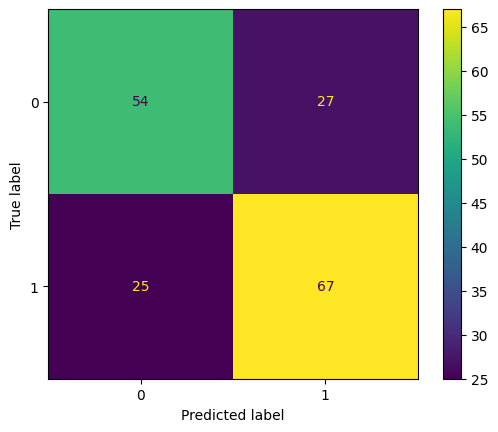

In [6]:
import sys
sys.path.append("../../function")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from function import classification

LR = LogisticRegression(random_state=42)
LR = classification.model_training(train_x, train_y.values.ravel(), LR)

C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7398843930635838
[[61 20]
 [25 67]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        81
           1       0.77      0.73      0.75        92

    accuracy                           0.74       173
   macro avg       0.74      0.74      0.74       173
weighted avg       0.74      0.74      0.74       173



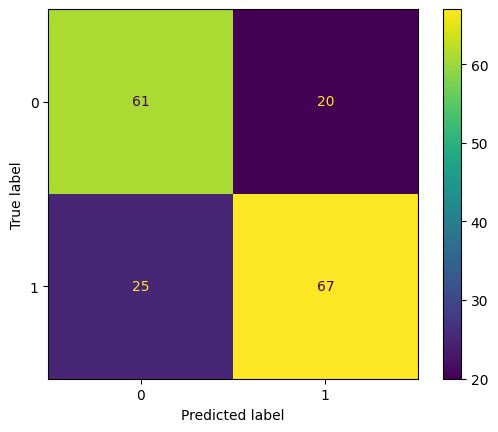

In [7]:
RF = RandomForestClassifier(random_state=42)
RF = classification.model_training(train_x, train_y, RF)

Index(['fp1_mean', 'fp1_median', 'fp1_min', 'fp1_max', 'fp1_range',
       'fp1_kurtosis', 'fp1_skew', 'fp2_mean', 'fp2_median', 'fp2_min',
       'fp2_max', 'fp2_range', 'fp2_kurtosis', 'fp2_skew', 'fp1_delta_mean',
       'fp1_delta_min', 'fp1_delta_max', 'fp1_delta_range', 'fp1_theta_mean',
       'fp2_delta_mean', 'fp2_delta_min', 'fp2_delta_max', 'fp2_delta_range',
       'fp2_theta_mean', 'fp1_var', 'fp2_var'],
      dtype='object')
[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False  True  True  True  True  True
  True  True]
[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1]


C:\Users\Edwin Sanjaya\DataspellProjects\bci-finalproject\function\classification.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Train acc: 1.0
[[313   0]
 [  0 375]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       375

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688


Test acc: 0.7514450867052023
[[60 21]
 [22 70]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.77      0.76      0.77        92

    accuracy                           0.75       173
   macro avg       0.75      0.75      0.75       173
weighted avg       0.75      0.75      0.75       173



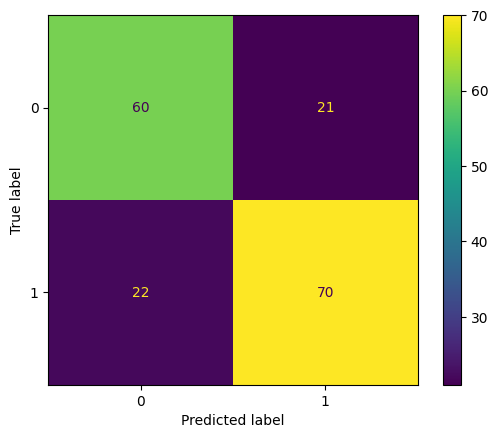

In [8]:
rfe_columns = classification.RFE_analysis(train_x, train_y, RF, n_feature_to_select=0.9)
train_x_rfe = train_x[train_x.columns[rfe_columns]]
RF = classification.model_training(train_x_rfe, train_y, RF)